 # Project Shopping online
 
 
 #descrpition 

# Load and Labraries

In [ ]:
# importing necessary Python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import plotly.express as px
#import plotly.offline as pyoff
#import plotly.graph_objs as go 
#import plotly.figure_factory as ff

# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
#from multiscorer import MultiScorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
#encode
from sklearn.preprocessing import LabelEncoder
#import xgboost as xgb
import time 

In [ ]:
# Loading the data
train= pd.read_csv("Train.csv")
test= pd.read_csv("Test.csv")

In [ ]:
train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


In [ ]:
test.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A


In [ ]:
train['train_y_n']=1
test['train_y_n']=0
all=pd.concat([train,test])

In [ ]:
all.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,train_y_n
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,1


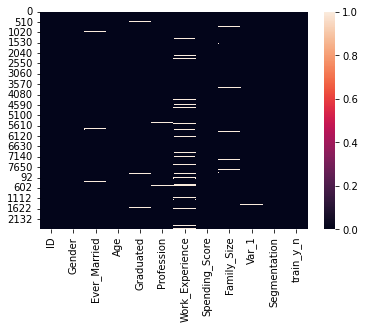

In [ ]:
#Visualization to check for missing values
sns.heatmap(all.isna())

In [ ]:
all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
 11  train_y_n        10695 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1.1+ MB


In [ ]:
all.describe()


,ID,Age,Work_Experience,Family_Size,train_y_n
count,10695.000000,10695.000000,9597.000000,10247.000000,10695.000000
mean,463468.088640,43.511828,2.619777,2.844052,0.754371
std,2600.966411,16.774158,3.390790,1.536427,0.430480
min,458982.000000,18.000000,0.000000,1.000000,0.000000
25%,461220.500000,30.000000,0.000000,2.000000,1.000000
50%,463451.000000,41.000000,1.000000,3.000000,1.000000
75%,465733.500000,53.000000,4.000000,4.000000,1.000000
max,467974.000000,89.000000,14.000000,9.000000,1.000000


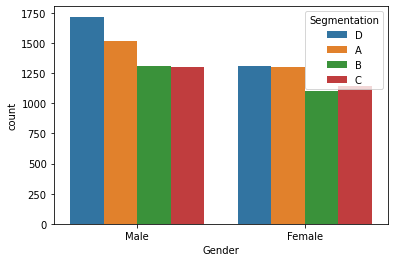

In [ ]:
sns.countplot(all['Gender'],hue=all['Segmentation'])


**Segmentation analysis**

In [ ]:
groupby_df = all[all['train_y_n']==1].groupby(['Gender', 'Segmentation']).agg({'Segmentation': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                     Segmentation
 Gender Segmentation              
 Female A                      909
        B                      861
        C                      922
        D                      959
 Male   A                     1063
        B                      997
        C                     1048
        D                     1309,                      Segmentation
 Gender Segmentation              
 Female A                    24.90
        B                    23.58
        C                    25.25
        D                    26.27
 Male   A                    24.07
        B                    22.57
        C                    23.73
        D                    29.64)

In [ ]:
groupby_df = all[all['train_y_n']==1].groupby(['Ever_Married', 'Segmentation']).agg({'Segmentation': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                           Segmentation
 Ever_Married Segmentation              
 No           A                      801
              B                      479
              C                      398
              D                     1607
 Yes          A                     1137
              B                     1348
              C                     1549
              D                      609,
                            Segmentation
 Ever_Married Segmentation              
 No           A                    24.38
              B                    14.58
              C                    12.12
              D                    48.92
 Yes          A                    24.49
              B                    29.03
              C                    33.36
              D                    13.12)

In [ ]:
all['Ever_Married'].mode()

0    Yes
dtype: object

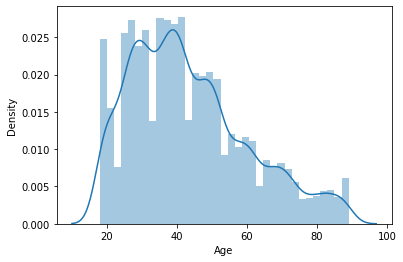

In [ ]:
sns.distplot(all['Age'])


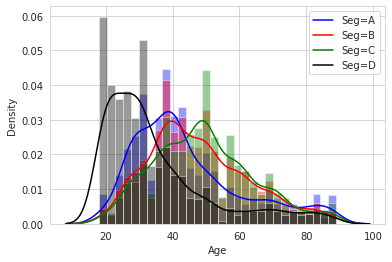

In [ ]:
sns.set_style('whitegrid')
sns.distplot(all[all['Segmentation']=='A']['Age'],bins=30,color='blue')
sns.distplot(all[all['Segmentation']=='B']['Age'],bins=30,color='red')
sns.distplot(all[all['Segmentation']=='C']['Age'],bins=30,color='green')
sns.distplot(all[all['Segmentation']=='D']['Age'],bins=30,color='black')
plt.legend(labels=['Seg=A', 'Seg=B', 'Seg=C','Seg=D'])

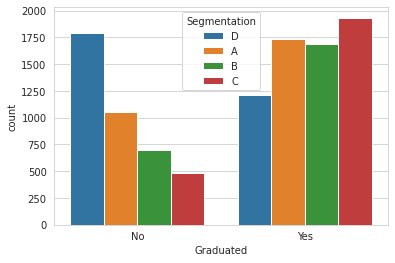

In [ ]:
sns.countplot(all['Graduated'],hue=all['Segmentation'])


In [ ]:
groupby_df = all[all['train_y_n']==1].groupby(['Graduated', 'Segmentation']).agg({'Segmentation': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                        Segmentation
 Graduated Segmentation              
 No        A                      729
           B                      508
           C                      348
           D                     1437
 Yes       A                     1219
           B                     1332
           C                     1607
           D                      810,                         Segmentation
 Graduated Segmentation              
 No        A                    24.12
           B                    16.81
           C                    11.52
           D                    47.55
 Yes       A                    24.54
           B                    26.81
           C                    32.35
           D                    16.30)

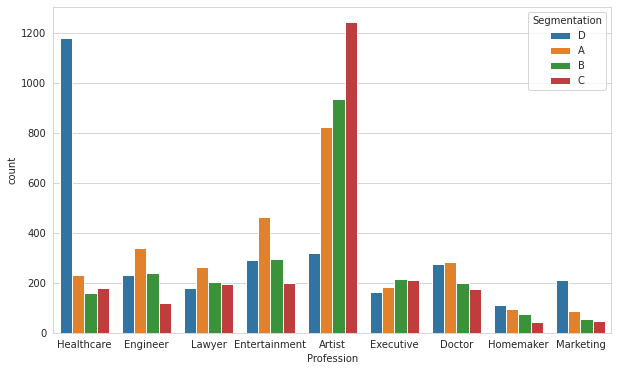

In [ ]:
#Profession
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(all['Profession'],hue=all['Segmentation'])

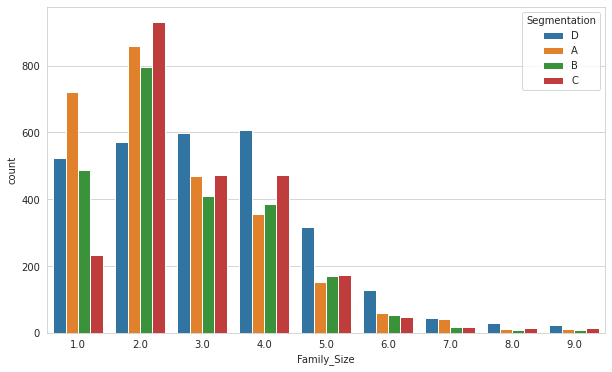

In [ ]:
#Family_Size
sns.countplot(all['Family_Size'],hue=all['Segmentation'])


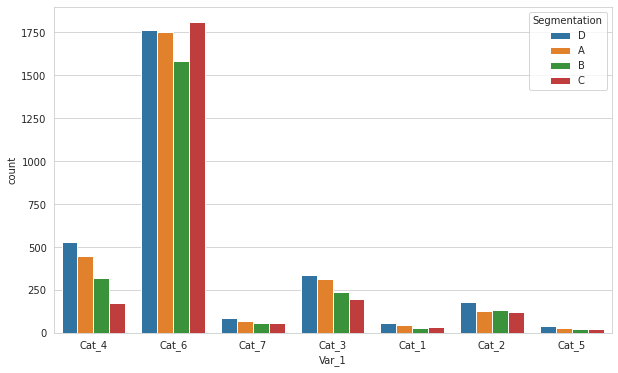

In [ ]:
#Var_1
sns.countplot(all['Var_1'],hue=all['Segmentation'])

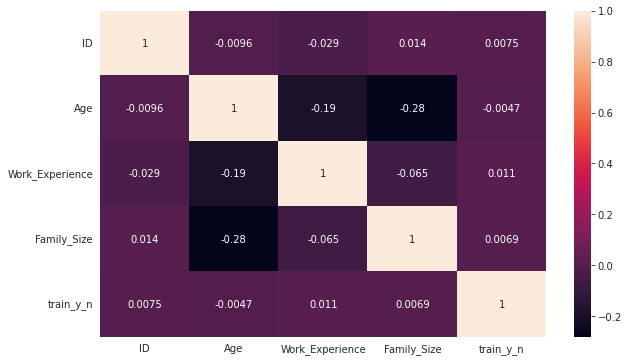

In [ ]:
sns.heatmap(all.corr(),annot=True)


# **Feature Engineering & Missing Value Treatment**


In [4]:
df['Var_1'].fillna(df['Var_1'].mode()[0], inplace=True)

NameError: ignored

In [5]:
feature_cols = all.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Segmentation')
feature_cols.remove('train_y_n')
label_col = 'Segmentation'
print(feature_cols)

AttributeError: ignored

In [6]:
all.isnull().sum()

AttributeError: ignored

In [ ]:
#Gender
all=pd.get_dummies(all,prefix='Gender',columns=['Gender'],drop_first=True)

In [ ]:
all.head(2)


In [ ]:
#Ever_Married
sns.countplot(all['Ever_Married'],hue=all['Family_Size'])

In [ ]:
all[all['Ever_Married'].isnull()]['Family_Size'].value_counts()

In [ ]:
all['Ever_Married']=all['Ever_Married'].fillna('Yes')


In [ ]:
all=pd.get_dummies(all,prefix='Married',columns=['Ever_Married'],drop_first=True)


In [ ]:
all.head(2)


In [ ]:
#Graduated
sns.countplot(all['Graduated'])


In [ ]:
all['Graduated']=all['Graduated'].fillna('Yes')


In [ ]:
all=pd.get_dummies(all,prefix='Graduated',columns=['Graduated'],drop_first=True)
all.head(2)


In [ ]:
#Profession
all['Profession'].fillna('Unknown',inplace=True)
all['Profession']=all['Profession'].astype('str')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
all['Profession_en']=le.fit_transform(all['Profession'])
sns.countplot(all['Profession_en'],hue=all['Profession'])


In [ ]:
all['Profession_en'].value_counts()


In [ ]:
all.drop('Profession',axis=1,inplace=True)



In [ ]:
#Work_Experience
all['Work_Experience'].fillna(all['Work_Experience'].mean(),inplace=True)

In [ ]:
#Spending_Score
all.loc[all['Spending_Score']=='Low','Spending_Score']=1
all.loc[all['Spending_Score']=='Average','Spending_Score']=2
all.loc[all['Spending_Score']=='High','Spending_Score']=3
all['Spending_Score']=all['Spending_Score'].astype('int')


In [ ]:
#Family_Size
all['Family_Size'].fillna(round(all['Family_Size'].mean()),inplace=True)
#Var_1
all['Var_1'].fillna('Cat_6',inplace=True)
all['Var_1']=all['Var_1'].apply(lambda x:x[-1])
all['Var_1']=all['Var_1'].astype('int')

In [ ]:
#Train & Test Split
from sklearn.model_selection import train_test_split
df_train, df_eval = train_test_split(all[all['train_y_n']==1], test_size=0.40, random_state=101, shuffle=True, stratify=all[all['train_y_n']==1][label_col])
le = preprocessing.LabelEncoder()
df_train['Segmentation']=le.fit_transform(df_train['Segmentation'])
df_eval['Segmentation']=le.fit_transform(df_eval['Segmentation'])

In [ ]:
df_train.info()


In [ ]:
df_eval.info()


# **Model Building**


In [ ]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter
sns.set_style('whitegrid')

In [ ]:
params = {}
params['learning_rate'] = 0.04
params['max_depth'] = 18
params['n_estimators'] = 3000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11
#params['class_weight']: {0: 0.44, 1: 0.4, 2: 0.37}

In [ ]:
feature_cols = df_train.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Segmentation')
feature_cols.remove('train_y_n')
label_col = 'Segmentation'
print(feature_cols)

['Age', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Gender_Male', 'Married_Yes', 'Graduated_Yes', 'Profession_en']


In [ ]:
cat_cols=['Spending_Score','Family_Size','Var_1','Gender_Male','Married_Yes','Graduated_Yes','Profession_en']
clf = lgb.LGBMClassifier(**params)
    
clf.fit(df_train[feature_cols], df_train[label_col], early_stopping_rounds=100, eval_set=[(df_train[feature_cols], df_train[label_col]), (df_eval[feature_cols], df_eval[label_col])], eval_metric='multi_error', verbose=True, categorical_feature=cat_cols)

eval_score = accuracy_score(df_eval[label_col], clf.predict(df_eval[feature_cols]))

print('Eval ACC: {}'.format(eval_score))

[1]	valid_0's multi_error: 0.719008	valid_0's multi_logloss: 1.36928	valid_1's multi_error: 0.718711	valid_1's multi_logloss: 1.36994
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_error: 0.692562	valid_0's multi_logloss: 1.35576	valid_1's multi_error: 0.696097	valid_1's multi_logloss: 1.35788
[3]	valid_0's multi_error: 0.625207	valid_0's multi_logloss: 1.34239	valid_1's multi_error: 0.630731	valid_1's multi_logloss: 1.34583
[4]	valid_0's multi_error: 0.591942	valid_0's multi_logloss: 1.3287	valid_1's multi_error: 0.598823	valid_1's multi_logloss: 1.33322
[5]	valid_0's multi_error: 0.560331	valid_0's multi_logloss: 1.31858	valid_1's multi_error: 0.574969	valid_1's multi_logloss: 1.32373
[6]	valid_0's multi_error: 0.528306	valid_0's multi_logloss: 1.30797	valid_1's multi_error: 0.54368	valid_1's multi_logloss: 1.31407
[7]	valid_0's multi_error: 0.498347	valid_0's multi_logloss: 1.29648	valid_1's multi_error: 0.523854	valid_1's multi_logloss: 1.30353
[

In [ ]:
test=all[all['train_y_n']==0]
train=all[all['train_y_n']==1]

In [ ]:
#Since there is big overlap between test and train, using train data for all the overlapping IDs
sub=pd.merge(left=test['ID'],right=train[['ID','Segmentation']],how='left',on='ID')

In [ ]:
actual_test=(test[test['ID'].isin(train['ID'])==False])
actual_test.shape

(295, 12)

In [ ]:
pred=clf.predict(actual_test[feature_cols])
pred=le.inverse_transform(pred)
actual_test['Segmentation']=pred
l=actual_test[['ID','Segmentation']]
r=sub[sub['Segmentation'].isnull()==False]
fr=[l,r]
sub=pd.concat(fr)
sub[['ID','Segmentation']].to_csv('submission.csv',index = False)

# **knn**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=all

In [ ]:
dataset.head()


,ID,Age,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,train_y_n,Gender_Male,Married_Yes,Graduated_Yes,Profession_en
0,462809,22,1.000000,1,4.0,4,D,1,1,0,0,5
1,462643,38,2.619777,2,3.0,4,A,1,0,1,1,2
2,466315,67,1.000000,1,1.0,6,B,1,0,1,1,2
3,461735,67,0.000000,3,2.0,6,B,1,1,1,1,7
4,462669,40,2.619777,3,6.0,6,A,1,0,1,1,3


# **Preprocessing**


The next step is to split our dataset into its attributes and labels. To do so, use the following code:

In [1]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# we need to remove column Segmenation
print(X)
print(y)

NameError: ignored

The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.

Train Test Split
To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

To create training and test splits, execute the following script:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

The above script splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated

The following script performs feature scaling:



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
The next step is to split our dataset into its attributes and labels. To do so, use the following code:

# Modeling

In [3]:
#knn
#trai
#svc